# Textual analysis of "The Secret History"

## Import packages

In [ ]:
!pip install vaderSentiment
!pip install nltk

In [1]:
import requests
import re
import tqdm
import os
import string
import operator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from os.path import join

import nltk
import nltk
nltk.download('vader_lexicon', quiet=False)

nltk.download('stopwords')

from nltk import word_tokenize,sent_tokenize,pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

stopwords = stopwords.words('english')

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
ana = SentimentIntensityAnalyzer()


import warnings
warnings.filterwarnings("ignore")


import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('sentiwordnet')

def remove_punctuation(words):
    new_list= []
    for w in words:
        if w.isalnum():
            new_list.append( w )
    return new_list

def ptb_to_wordnet(PTT):

    if PTT.startswith('J'):
        ## Adjective
        return 'a'
    elif PTT.startswith('V'):
        ## Verb
        return 'v'
    elif PTT.startswith('N') and not PTT.startswith('NNP'):
        ## Noune
        return 'n'
    elif PTT.startswith('R'):
        ## Adverb
        return 'r'
    else:
        return ''

def wordnet_hypernyms(token):
    all_hypernyms = []

    word_senses = wn.synsets(token)

    hypernyms = lambda s: s.hypernyms()

    for ws in word_senses:

        hypernyms = [hyp.name() for hyp in list(ws.closure(hypernyms))]
        for h in hypernyms:
            all_hypernyms.append(h[0:h.index('.')])

    return all_hypernyms

def intersection(list1,list2):
    return list(set(list1) & set(list2))


def collocation( text , regex , distance ):

    freq_c = dict()

    sentences = sent_tokenize( text )

    for sentence in sentences:

        words = word_tokenize( sentence )
        words = remove_punctuation(words)

        for i,w in enumerate(words):
            if re.search( regex , w , re.IGNORECASE ):
                index_regex = i 

                for x in range( i - distance , i + distance ):
                    if x >= 0 and x < len(words) and words[x].lower() != words[index_regex].lower():
                        if len(words[x]) > 0:
                            word = words[x].lower()
                            freq_c[ word ] = freq_c.get( word , 0 ) + 1
            
    return freq_c


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


## Create a lemmatised version of the book

In [2]:
lemmatiser = WordNetLemmatizer()

with open('secret_history.txt',encoding='utf-8') as fh:
    full_text = fh.read()
    lemmatised = ''
    words = word_tokenize(full_text)
    words = remove_punctuation(words)
    pos = nltk.pos_tag(words)

    for i,word in enumerate(words):

        wn_pos = ptb_to_wordnet( pos[i][1] )

        if re.search( r'\w+' , wn_pos , re.IGNORECASE ):
            lemma = lemmatiser.lemmatize( words[i] , wn_pos )
            lemmatised += f' {lemma.lower()} '
                
        else:
            lemmatised += f' {word.lower()}' 
            
with open('secret_history_lemmatised.txt','w',encoding='utf-8') as out:
    out.write(lemmatised)
            

## Create an XML version with chapter divisions

In [3]:
with open('secret_history.xml','w',encoding='utf-8') as out:
    out.write('<novel>\n<div>')
    sections = re.split('\n',full_text)
    
    for section in sections:
        if re.search('(Chapter)|(Prologue)|(Epilogue)',section):
            section = re.sub('','',section)
            out.write('</div>\n<div>')
            out.write('<title>')
            section = re.sub('\^','',str(section))
            out.write(section.strip())
            out.write('</title>')
        else:
            out.write(section)
    out.write('</div>\n</novel>')

## Most frequent words

In [4]:
freq = Counter()

with open('secret_history_lemmatised.txt',encoding='utf-8') as fh:
    full_text = fh.read()
    
words = word_tokenize(full_text)
words = remove_punctuation(words)
words = [word for word in words if word not in stopwords]
freq = Counter(words)
    
for word,count in freq.most_common(50):
    print(f'{word} ({count})')

say (2889)
go (1004)
henry (967)
know (953)
think (841)
look (692)
one (689)
get (686)
like (654)
francis (636)
would (584)
back (568)
bunny (525)
charles (523)
see (498)
could (474)
come (472)
time (410)
thing (389)
us (377)
make (376)
take (372)
tell (360)
even (341)
around (330)
way (328)
want (324)
something (322)
room (321)
camilla (298)
hand (291)
much (289)
find (275)
night (268)
eye (268)
door (261)
long (259)
good (254)
julian (253)
little (249)
talk (247)
leave (240)
turn (240)
seem (239)
try (230)
never (225)
day (225)
saw (224)
old (224)
light (218)


## Most frequent adjectives, adverbs, nouns

In [5]:
relevant_tags = ['JJ','JJR','JJS','NN','NNS','RB','RBR','RBS']
black_list = ['i','julian','francis','henry','charles','camilla','corcoran']

data = []

with open('secret_history_lemmatised.txt',encoding='utf-8') as fh:
    full_text = fh.read()
    sentences = sent_tokenize(full_text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = remove_punctuation(words)
        pos_tags = nltk.pos_tag(words)
        for word_code in pos_tags:
            if word_code[1] in relevant_tags and word_code[0] not in black_list:
                row = []
                row.append(word_code[0])
                row.append(word_code[1])
                data.append(row)

words = pd.DataFrame(data,columns=['word','code'])


In [6]:
adjectives = words.query( f'(code=="JJR") or (code=="JJS") or (code=="JJ")' )
adjectives_freq = Counter( adjectives['word'].tolist() )

for word,count in adjectives_freq.most_common(50):
    print(f'{word} ({count})')

good (245)
little (239)
old (224)
much (185)
other (178)
last (173)
long (171)
bunny (164)
first (163)
bad (140)
more (139)
own (133)
black (112)
big (103)
new (102)
such (102)
open (101)
white (98)
few (96)
dark (92)
hard (92)
right (88)
sure (87)
greek (86)
next (81)
great (79)
same (79)
many (78)
terrible (67)
only (66)
hampden (64)
red (63)
dead (62)
able (61)
light (60)
small (57)
wrong (57)
empty (56)
second (56)
full (54)
least (52)
sudden (52)
most (51)
large (51)
strange (51)
late (51)
clear (50)
high (49)
certain (48)
different (48)


In [7]:
adverbs = words.query( f'(code=="RB") or (code=="RBR") or (code=="RBS")' )
adverbs_freq = Counter( adverbs['word'].tolist() )

for word,count in adverbs_freq.most_common(50):
    print(f'{word} ({count})')

not (800)
there (464)
then (454)
so (433)
back (419)
just (359)
even (341)
too (315)
very (287)
now (283)
never (225)
here (224)
only (224)
still (203)
well (198)
really (192)
again (178)
quite (159)
more (153)
as (149)
away (134)
up (131)
always (119)
almost (108)
once (106)
much (103)
rather (103)
far (97)
finally (96)
ever (95)
down (91)
suddenly (89)
long (85)
maybe (83)
pretty (70)
most (68)
else (67)
later (63)
perhaps (60)
sometimes (58)
actually (57)
close (57)
right (57)
certainly (56)
alone (56)
also (54)
enough (54)
slightly (49)
already (48)
nearly (48)


In [8]:
nouns = words.query( f'(code=="NN") or (code=="NNS")' )
nouns_freq = Counter( nouns['word'].tolist() )

for word,count in nouns_freq.most_common(50):
    print(f'{word} ({count})')

time (410)
thing (389)
way (328)
something (322)
room (321)
hand (291)
night (268)
eye (268)
door (258)
bunny (256)
day (225)
anything (214)
look (213)
people (208)
moment (181)
face (181)
head (173)
car (167)
house (161)
glass (159)
home (151)
voice (147)
cigarette (147)
place (141)
year (140)
window (140)
course (139)
school (134)
kind (132)
morning (127)
book (124)
lot (124)
nothing (122)
hair (118)
sort (118)
table (116)
man (114)
hour (114)
name (108)
bed (108)
light (107)
chair (101)
everything (97)
life (96)
afternoon (95)
paper (94)
hampden (93)
friend (92)
twin (92)
minute (91)


## Which adjectives are used to describe 'educational institutions'?

In [9]:
school_words = []

with open('secret_history.txt',encoding='utf-8') as fh:
    full_text = fh.read()
    words = word_tokenize(full_text)
    for word in words:
        if 'educational_institution' in wordnet_hypernyms(word) or 'educator' in wordnet_hypernyms(word):
            school_words.append(word.lower())

school_words = list(set(school_words))
print('Educational institutions:')
print(school_words)

school_words = [f'({token})' for token in school_words]

regex = '|'.join(school_words)

print('\nWords used in the context:')
freq = collocation(full_text,regex,5)
sorted_freq = sorted(freq.items(), key=operator.itemgetter(1),reverse=True)

for word,count in sorted_freq:
    if word not in stopwords:
        print(word)    

Educational institutions:
['tutor', 'academics', 'instructor', 'kindergarten', 'tutors', 'professors', 'cyril', 'headmaster', 'school', 'professor', 'academy', 'teacher', 'teachers', 'lyceum', 'seminary', 'academic', 'schools']

Words used in the context:
back
high
said
would
went
one
money
could
every
got
college
little
years
way
expensive
get
well
like
time
prep
hampden
gone
drive
two
go
cloke
even
day
next
morning
near
greek
think
dr
another
week
grade
night
last
really
away
julian
brooklyn
know
early
circumstances
private
summers
switzerland
boston
always
light
piano
wrote
french
named
ancient
speak
rather
basis
difficult
school
job
psychology
lounge
take
give
perhaps
refer
good
thought
stairs
couple
first
weeks
together
far
began
monotone
nursery
finishes
closed
ended
staying
started
henry
afternoon
came
term
old
rayburn
parents
england
sort
us
walked
coming
ceramics
may
someone
camilla
preparatory
decided
leave
everyone
classics
new
door
especially
bunny
say
learned
hours
standin

## Find sentences containing synonyms of the word 'dark'

In [10]:
synonyms = []

for ss in wn.synsets('dark'):
    synonyms.extend(ss.lemma_names())
    
synonyms = list(set(synonyms))
print(synonyms)

['dismal', 'moody', 'drab', 'dingy', 'obscure', 'grim', 'morose', 'blue', 'benighted', 'dark-skinned', 'wickedness', 'black', 'non-white', 'sour', 'dreary', 'drear', 'iniquity', 'shadow', 'nighttime', 'saturnine', 'sorry', 'glowering', 'sullen', 'darkness', 'colored', 'dour', 'gloomy', 'glum', 'dark', 'coloured', 'night', 'sinister', 'disconsolate']


In [11]:
freq = Counter()
total_nr_words = 0

with open('secret_history.txt',encoding='utf-8') as fh:
    full_text = fh.read()
    sentences = sent_tokenize(full_text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        total_nr_words += len(words)
        if len(intersection(words,synonyms))>0:
            freq.update( intersection(words,synonyms) )
            sentence = re.sub('\n+',' ',sentence)
            print(sentence)

This was a tale that told itself simply and well: the loose rocks, the body at the bottom of the ravine with a clean break in the neck, and the muddy skidmarks of dug-in heels pointing the way down; a hiking accident, no more, no less, and it might have been left at that, at quiet tears and a small funeral, had it not been for the snow that fell that night; it covered him without a trace, and ten days later, when the thaw finally came, the state troopers and the FBI and the searchers from the town all saw that they had been walking back and forth over his body until the snow above it was packed down like ice.
It is difficult to believe that such an uproar took place over an act for which I was partially responsible, even more difficult to believe I could have walked through it – the cameras, the uniforms, the black crowds sprinkled over Mount Cataract like ants in a sugar bowl – without incurring a blink of suspicion.
Now the searchers have departed, and life has grown quiet around me,

I couldn't see much but a Dantesque mass of bodies on the dance floor and a cloud of smoke hovering near the ceiling, but I could see, where light from the corridor spilled into the darkness, an upturned glass here, a wide lipsticked laughing mouth there.
As parties go, this was a nasty one and getting worse – already certain of the freshmen had begun to throw up as they waited in dismal lines for the bathroom – but it was Friday and I'd spent all week reading and I didn't care.
Having been to every Friday night party since school began, I knew they avoided them like the Black Death.
How does his girlfriend get all those black eyes?
With my luck it could only be Judy Poovey, trying to hit up on me as she inevitably did about this time every Friday night.
'Like some security guards handing out a girl on a stretcher and a black dog attacking some hippies.'
The night wind in my hair, their indistinct talk, the songs on the radio all mingled and blurred in my dreams.
It was dark and I co

The, too,' I said, feeling sorry for him, unaccountably so.
'Good night.'
I turned quickly and almost stumbled over two tremendous pigskin suitcases, strapped in black leather, just inside the doorway.
It seemed that I remembered Henry telling a story, one night at Francis's house, about some South American country – maybe Argentina, I wasn't sure.
Not until almost four in the afternoon did I finally close my books, and when I looked out my window over the meadow, the light fading in the west and the ashes and yews casting long shadows on the snow, it was as if I'd just woken up, sleepy and disoriented, to find it was getting dark and I had slept through the day.
It was the big back-to-school dinner that night – roast beef, green beans almondine, cheese souffle and some elaborate lentil dish for the vegetarians.
Next to me was a table of art students, branded as such by their ink-grimed fingernails and the self-conscious paint spatters on their clothes; one of them was drawing on a c

I Bunny came down late the next morning, puff-eyed and sullen, while Francis and the twins and I were eating our breakfasts.
I was looking, obliquely, at Bunny slumped over his bowl « when all of a sudden, in the window behind his head, I saw the distant figure of Mr Hatch, walking across the open field beyond the garden, carrying the dark, curlicued ruins of the Malacca chair to the rubbish heap.
With leers and winks he told stories about lapsed nuns, sluttish Catholic girls, pederastic priests ('So then, this Father What's-His-Name, he said to the altar boy – this kid is nine years old, mind you, he's in my Cub Scout troop – he says to Tim Mulrooney, «Son, would you like to see where me and all the other fathers sleep at night?"').
We were all of us painfully aware of that metaphoric vial of nitroglycerine which Bunny carried around with him day and night, and which, from time to time, he allowed us a glimpse of, unless anyone forget it was always with him, and he had the power to da

There were two drab tablets at the bottom.
Last night I went with her and Trace to the Brasserie, and, I'm totally serious, she stuffed herself until she could not breathe.
The colored balls spun out in all directions.
Very pretty, in a snub-nosed, good-natured way; dark hair, freckles, light blue eyes.
Sweet chuckles in the dark and her hair falling across my face, funny little catches in her breath like the girls back in high school.
That was the way most of my classmates ' lived – talking rather self-consciously at breakfast about their liaisons of the previous night, as if this harmless, homey little vice, which fell somewhere below drink and above gluttony in the catalogue of sins, was somehow the abyss of depravity and dissipation.
Posters; dried flowers in a beer mug; the luminous glow of her stereo in the dark.
I buried my face in the soft, slightly acrid-smelling flesh of her neck and rocked her back and forth – babbling, mumbling, feeling myself fall down and down, into a d

When we arrived, damp and uncomfortable from Francis's sodden car seats, cars lined the road on both sides, as if for a rural dance or bingo night, sloping gently into the grassy ditch.
said Julian, who had a pagan's gloomy view of death coupled with a horror of the non-specific.)
('That means black,' whispered Francis.)
For a moment I was afraid I would black out.
The wasp still clung with one black feeler to the edge of the pew.
It was a muddy, black day in the churchyard.
The rain had stopped but the sky was dark and the wind was blowing hard.
A few paces in front of me Camilla struggled on tiptoe to pull down her umbrella, which dragged her along in little skipping steps – Mary Poppins in her black funeral dress.
It was a resemblance they tried to cultivate especially Mrs Corcoran, with her hairdo and faux-Jackie glasses – but it also had some slight physical basis: in Brady and Patrick's toothy, too-tanned gauntness there was a shadow of Bobby Kennedy while the other brothers, Bun

I spent the night on Dr Roland's couch, and after breakfast, came back to my room with blueberry muffins and a half-gallon carton of orange juice which, with extraordinary difficulty, I had managed to steal from the buffet in the dining hall.
From the state of the bedclothes, which were tumbled and tossed, blanket trailing on the floor and the stained ticking of the mattress showing where he'd pulled the sheets loose, I gathered he'd not had a very good night of it.
The rest of the Kosher wine had disappeared, I noticed, in the night.
I thought it was Francis or Henry – both of whom I'd tried to reach repeatedly the night before – or maybe even Camilla, but it was Charles.
You'll find it in the drawer of my night table.
I too am very sorry that he is dead.
Afraid of the dark.'
He went to the night table and got the bottle.
We smiled and waved back, happy day, two guys on a ride – then drove for a block or two in grim, superstitious silence.
It rained all day and the rest of the night.


In [12]:
for word,count in freq.most_common():
    print(f'{word} ({count})')

night (240)
dark (161)
black (106)
blue (42)
sorry (41)
darkness (12)
colored (9)
shadow (9)
sour (7)
obscure (6)
gloomy (6)
grim (5)
sullen (5)
dreary (4)
moody (3)
drab (2)
sinister (2)
glum (2)
dismal (1)
disconsolate (1)
morose (1)


In [13]:
print( f'{(sum(freq.values())/total_nr_words)*100}% of the words in the novel are a synponym of "dark"')

0.26756687160009013% of the words in the novel are a synponym of "dark"


## Clothing

References to tweed jackets?

In [14]:
freq = Counter()

with open('secret_history_lemmatised.txt',encoding='utf-8') as fh:
    full_text = fh.read()
    words = word_tokenize(full_text)
    
relevant_categories =  ['clothing','fabric']
    
for word in words:
    hypernyms = wordnet_hypernyms(word)
    if len(intersection(hypernyms,relevant_categories))>0:
        freq.update([word])

for word,count in freq.most_common(50):
    print(f'{word} ({count})')


felt (116)
coat (46)
clothes (43)
dress (41)
suit (36)
shirt (33)
tie (31)
jacket (29)
bathrobe (23)
trouser (16)
hat (16)
overcoat (16)
sweater (12)
sail (12)
scarf (11)
tweed (9)
sock (9)
wrap (9)
cap (8)
handkerchief (8)
pajama (7)
robe (7)
mac (7)
silk (6)
towel (6)
necktie (5)
wool (5)
jean (5)
costume (5)
rag (5)
chiton (5)
mack (5)
velvet (4)
linen (4)
laundry (4)
knit (4)
slicker (4)
royal (3)
canvas (3)
woolen (3)
undershirt (3)
pillbox (3)
khaki (3)
suspender (3)
uniform (2)
greatcoat (2)
cashmere (2)
veil (2)
stole (2)
flannel (2)


## Substances

In [15]:
freq = Counter()

with open('secret_history_lemmatised.txt',encoding='utf-8') as fh:
    full_text = fh.read()
    words = word_tokenize(full_text)
    
relevant_categories =  ['narcotic','drug']
    
for word in words:
    hypernyms = wordnet_hypernyms(word)
    if len(intersection(hypernyms,relevant_categories))>0:
        freq.update([word])

for word,count in freq.most_common(50):
    print(f'{word} ({count})')


cigarette (148)
beer (37)
whiskey (34)
wine (22)
aspirin (9)
liquor (9)
sour (8)
cocktail (7)
champagne (6)
cocaine (6)
martini (5)
bitter (5)
alcohol (5)
sens (5)
cigarettes (4)
brandy (4)
cigar (4)
gin (4)
cure (4)
tylenol (4)
antibiotic (4)
meth (4)
painkiller (4)
vodka (3)
dose (3)
demerol (3)
dope (3)
margaritas (3)
dalmane (3)
sling (2)
rum (2)
booze (2)
ale (2)
valium (2)
narcotic (2)
lsd (2)
antidote (2)
tequila (2)
amphetamine (2)
brew (2)
reefer (1)
shag (1)
cocktails (1)
stout (1)
chloroformed (1)
hypnotic (1)
codeine (1)
cordial (1)
phenobarbital (1)
beaujolais (1)


## Lexicon

In [16]:
dir = 'Lexicon'
if not os.path.isdir(dir):
    os.mkdir(dir)
    
base_url = 'https://raw.githubusercontent.com/peterverhaar/dark_academia/refs/heads/main/Lexicon/'

lexicon_files = [
    'academia.txt',
    'literature_and_culture.txt',
    'mood.txt',
    'objects.txt',
    'spaces.txt'
]
    

for l in lexicon_files:
    topic = l[ : l.rindex('.') ]
    response = requests.get( base_url + l)
    words = []
    if response:
        response.encoding = 'utf-8'
        out = open( os.path.join( dir , l ) , 'w' , encoding = 'utf-8' )
        out.write( response.text )
        out.close()

print('Lexicons have been downloaded!')



lexicons = dict()


for file in os.listdir(dir):
    if re.search(r'txt$',file):
    
        topic = re.sub( r'\.txt$','',file )
        words = []

        with open( join(dir,file) , encoding = 'utf-8' ) as file_handler:   
            for l in file_handler: 
                if re.search( r'\w' , l ):
                    words.append(l.strip().lower())

        lexicons[topic] = words    


Lexicons have been downloaded!


In [17]:
import os
from os.path import join

from tdmh import *
from nltk.stem import WordNetLemmatizer


csv = open( 'lexicon.csv' , 'w' , encoding = 'utf-8' )

## print header
csv.write('category,count\n')


with open('secret_history_lemmatised.txt',encoding='utf-8') as fh:
    
    lemmatised = fh.read()                
    words = word_tokenize(lemmatised)
    words = remove_punctuation(words)
    freq = Counter(words)
    tokens = len(lemmatised)

    for l in lexicons:
        print(f'{l} ...')   
        csv.write(f'{l},')

        count_occurrences = 0
        for word in l:
            count_occurrences += freq.get(word.lower(),0)
        csv.write( f'{ count_occurrences / tokens}\n' )

    csv.write('\n')

csv.close()

print("Done!")



mood ...
spaces ...
literature_and_culture ...
academia ...
objects ...
Done!


In [18]:


words = []
with open('secret_history_lemmatised.txt',encoding='utf-8') as fh:
    
    lemmatised = fh.read()                
    words = word_tokenize(lemmatised)
    words = remove_punctuation(words)
    
for l in lexicons:
    lexicon_freq = Counter()
    print(f'\n{l}')   
    for word in words:
        if word.lower() in lexicons[l]:
            lexicon_freq.update([word])
    for word,count in lexicon_freq.most_common(20):
        print(f"{word} ({count})")
   



mood
time (410)
dark (166)
silence (77)
past (58)
death (55)
blood (50)
shadow (34)
whisper (33)
silent (32)
murder (29)
funeral (26)
memory (24)
sad (20)
scream (17)
dawn (16)
secret (15)
ghost (15)
mystery (15)
history (14)
twilight (12)

spaces
house (161)
office (87)
college (72)
library (42)
campus (29)
church (18)
faculty (16)
corridor (12)
ruin (12)
tower (8)
dormitory (5)
estate (4)
castle (1)
university (1)
cathedral (1)

literature_and_culture
greek (115)
ancient (22)
rome (17)
plato (14)
classics (9)
latin (9)
homer (9)
fate (5)
dionysus (5)
poetry (4)
philosophy (3)
iliad (3)
tragedy (3)
virgil (2)
verse (2)
sophocles (1)
apollo (1)
oracle (1)
classicism (1)
mythology (1)

academia
course (139)
book (124)
college (72)
student (70)
study (49)
library (42)
term (40)
teacher (35)
campus (29)
learn (26)
dean (25)
teach (24)
literature (19)
freshman (19)
grade (17)
board (17)
reading (17)
faculty (16)
science (13)
examine (13)

objects
cigarette (148)
window (145)
paper (94)
sm

NameError: name 'df' is not defined

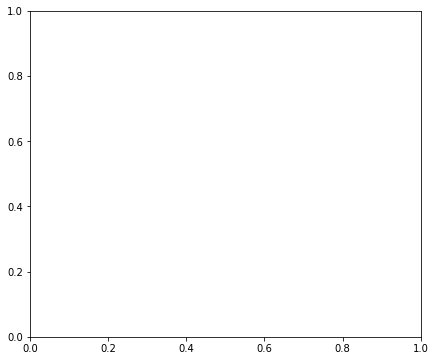

In [19]:
%matplotlib inline




fig = plt.figure( figsize=( 7 ,6 ) )
ax = plt.axes()

x = 'category'
y = 'count'

bar_width = 0.45
opacity = 0.8

ax.bar( df[x] , df[y] , width = bar_width, alpha = opacity , color = '#fcc11c')

plt.xticks(rotation= 75)

ax.set_xlabel('Category' , fontsize= 12)
ax.set_ylabel('Relative frequency' , fontsize = 12 )
ax.set_title( y.title() , fontsize=20 )


plt.show()

## Words in other domains

In [ ]:
selected_domains = [
    
 'psychological_feature',
 'situation',
 'state',
 'location',
 'idea',
 'illumination',
 'natural_object',
 'building',
 'dwelling',
 'housing',
 'physical_phenomenon',
 'natural_phenomenon',
 'educational_institution',
 'social_group',
 'bedroom_furniture',
 'achromatic_color',
 'cognitive_state',
 'psychological_state',
 'condition',
 'emotion',
 'expressive_style',
 'college_student',
 'certificate',
    'color']



In [ ]:
data = []

fh = open('secret_history_lemmatised.txt',encoding='utf-8')
full_text = fh.read()
words = word_tokenize(full_text.lower())
words = remove_punctuation(words)
for word in words:
    hypernyms = wordnet_hypernyms(word)
    for h in hypernyms:
        if h in selected_domains:
            row = []
            row.append(word)
            row.append(h)
            data.append(row)
            
domains_df = pd.DataFrame(data,columns=['word','domain'])

In [ ]:
domain = 'color'

words = domains_df.query( f'domain == "{domain}"')
words_freq = Counter(list(words['word']))
for word,count in words_freq.most_common(20):
    print(f'{word} ({count})')

In [ ]:
domain = 'emotion'

words = domains_df.query( f'domain == "{domain}"')
words_freq = Counter(list(words['word']))
for word,count in words_freq.most_common(20):
    print(f'{word} ({count})')

In [ ]:
domain = 'educational_institution'

words = domains_df.query( f'domain == "{domain}"')
words_freq = Counter(list(words['word']))
for word,count in words_freq.most_common(20):
    print(f'{word} ({count})')

# Sentences containing hypernyms

In [ ]:
specific_domains = ['emotion']
all_sentences = []

with open('secret_history.txt',encoding='utf') as fh:
    full_text = fh.read()
    sentences = sent_tokenize(full_text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = remove_punctuation(words)
        for word in words:
            hypernyms = wordnet_hypernyms(word)
            intersection = list(set(hypernyms) & set(specific_domains))
            if len(intersection) > 0:
                sentence = re.sub('\n',' ',sentence)
                all_sentences.append(sentence.strip())
                break

In [ ]:
print(f'The novel contains {len(sentences)} sentences.')
print(f'{len(all_sentences)} sentences were selected.')

for sentence in all_sentences[:15]:
    print(sentence+'\n')

In [ ]:
## Sentiment analysis

In [ ]:
## Named entity recognition